# LOGISTIC REGRESSION

# Data Exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv("diabetes.csv")

# Basic inspection
print(df.head())
print(df.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [5]:
# missing values
print(df.info())

# summary statistics
print(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

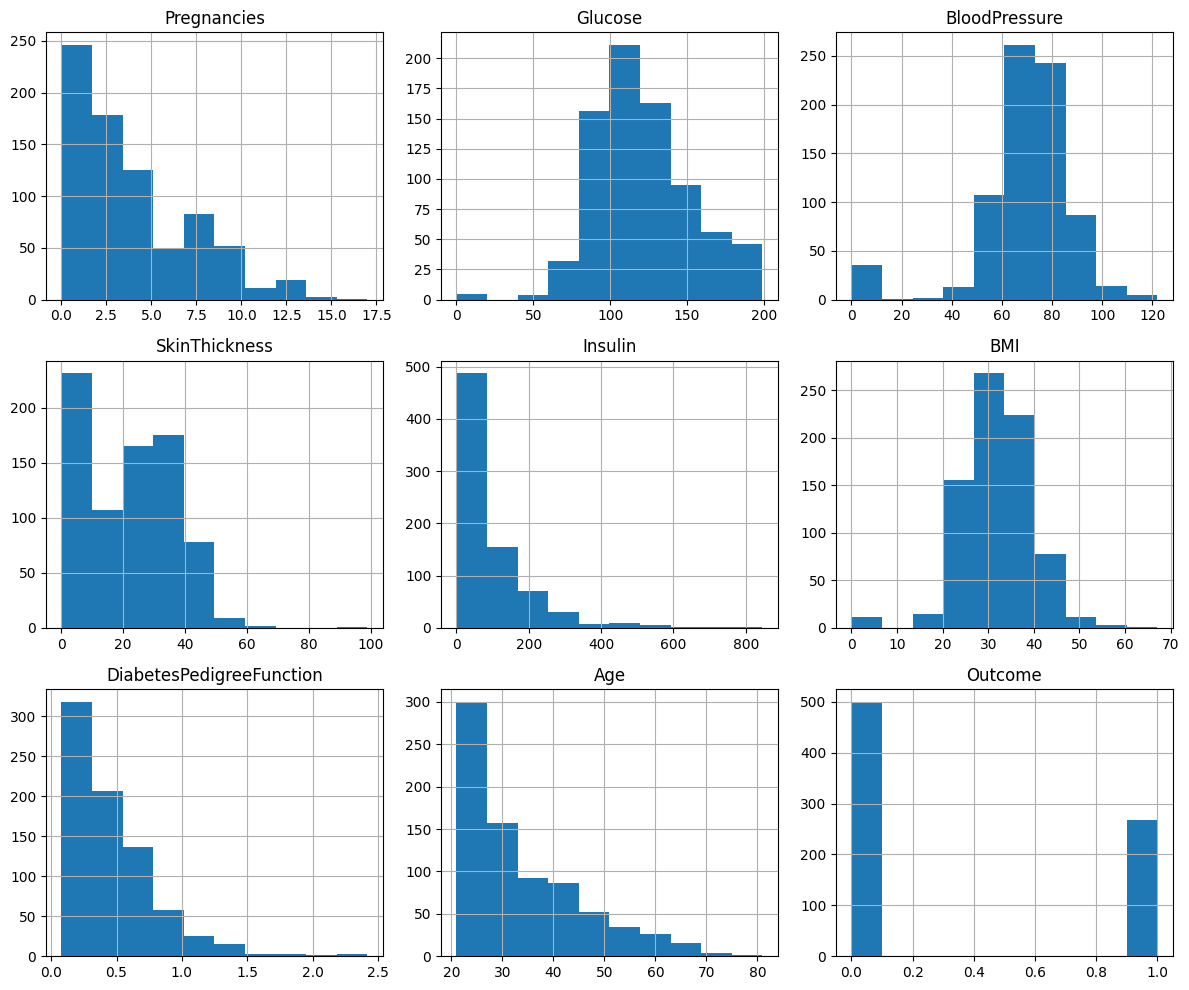

In [11]:
# histogram
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

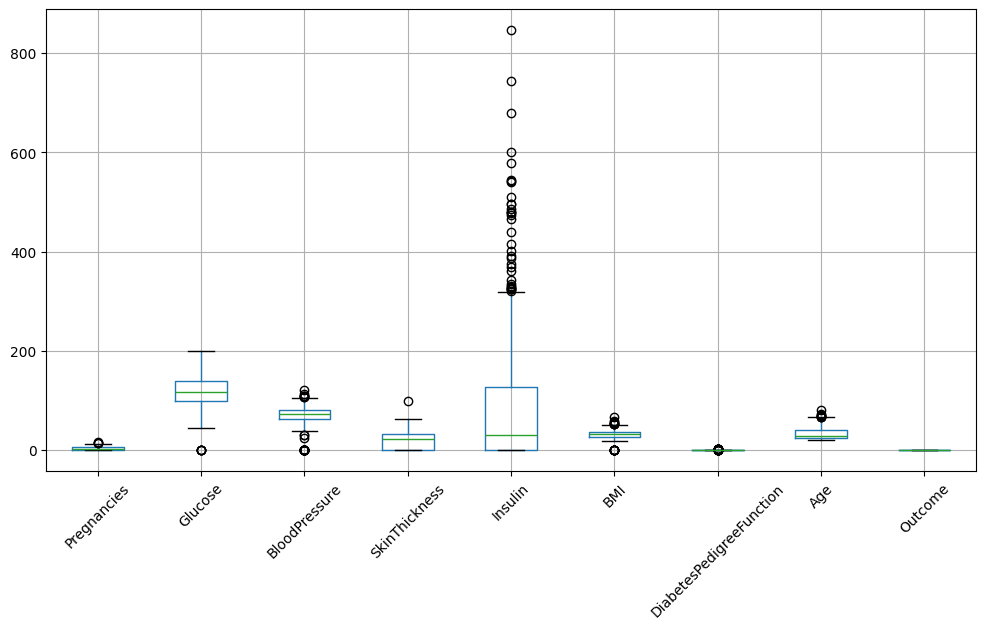

In [12]:
# box plot
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

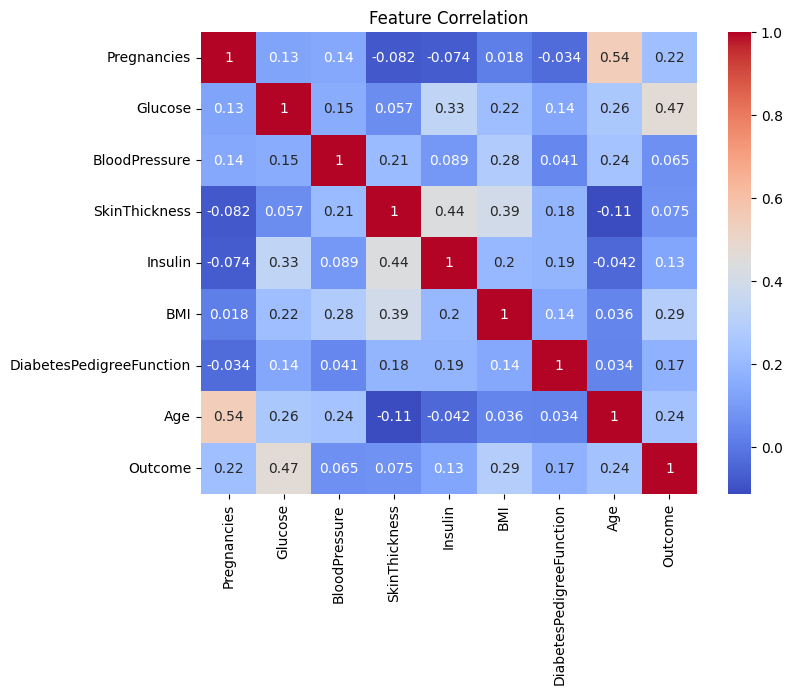

In [13]:
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

Data Preprocessing:

In [15]:
# Handling missing values with nan
zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[zero] = df[zero].replace(0, np.nan)

In [17]:
# Imputation using median
for col in zero:
    df[col] = df[col].fillna(df[col].median())

In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model Building

In [19]:
# Split Train–test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y )

**Logistic Regression model**

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Model Evaluation

In [21]:
# Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score,
                                roc_auc_score, roc_curve, classification_report )

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nClassification Report\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.7012987012987013
Precision: 0.5869565217391305
Recall   : 0.5
F1-score : 0.54
ROC-AUC  : 0.8127777777777777

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



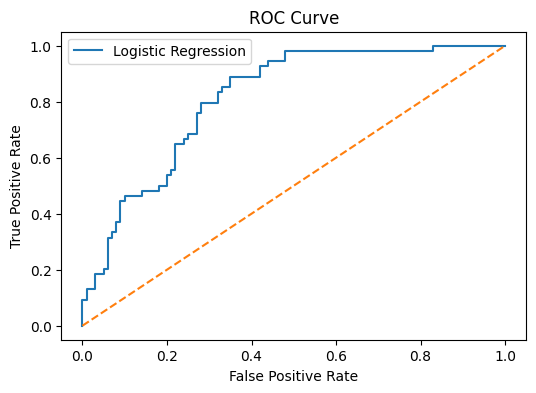

In [22]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Interpretation of Logistic Regression**

In [23]:
# Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

                    Feature  Coefficient
1                   Glucose     1.199056
5                       BMI     0.693546
0               Pregnancies     0.383407
6  DiabetesPedigreeFunction     0.234030
7                       Age     0.147219
3             SkinThickness     0.028110
2             BloodPressure    -0.043332
4                   Insulin    -0.072494


Interpretation:

Positive coefficients (↑ diabetes risk):

Glucose (strongest predictor)

BMI

Age

DiabetesPedigreeFunction

Lower impact variables:

BloodPressure

SkinThickness

Interpretation rule:

A 1-unit increase in a feature increases/decreases the log-odds of diabetes by the coefficient value, holding others constant.

# Deployment with Streamlit

In [26]:
# Save model and scaler
import joblib

joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")

#------------------------------------------

['feature_names.pkl']

#  Streamlit App (app.py)

In [25]:
# Streamlit App

import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load artifacts
model = joblib.load("diabetes_model.pkl")
scaler = joblib.load("scaler.pkl")
features = joblib.load("feature_names.pkl")

st.title("Diabetes Prediction App")

# User inputs
pregnancies = st.number_input("Number of Pregnancies", 0, 20, 1)
glucose = st.number_input("Glucose Level", 50, 300, 120)
bp = st.number_input("Blood Pressure", 30, 150, 70)
skin = st.number_input("Skin Thickness", 5, 100, 20)
insulin = st.number_input("Insulin", 10, 900, 80)
bmi = st.number_input("BMI", 10.0, 70.0, 25.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.05, 3.0, 0.5)
age = st.number_input("Age", 10, 100, 33)

# Create dataframe
input_data = pd.DataFrame([[
    pregnancies, glucose, bp, skin,
    insulin, bmi, dpf, age
]], columns=features)

# Scale input
input_scaled = scaler.transform(input_data)

# Prediction
if st.button("Predict"):
    probability = model.predict_proba(input_scaled)[0][1]
    prediction = "Diabetic" if probability >= 0.5 else "Non-Diabetic"

    st.subheader(f"Prediction: {prediction}")
    st.subheader(f"Diabetes Probability: {probability:.2f}")

2025-12-15 18:21:54.103 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 18:21:54.545 
  command:

    streamlit run C:\Users\samee\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-15 18:21:54.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 18:21:54.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 18:21:54.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 18:21:54.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 18:21:54.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 18:21:54.551 Thre

# Interview Questions:

**What is the difference between precision and recall?**
->
Precision and Recall are fundamental evaluation metrics for classification models, especially when the cost of errors is asymmetric. Although both are derived from the confusion matrix, they measure different aspects of model performance.

Precision: Precision measures how accurate the positive predictions are.
Precision=TP/FP+TP

Recall (Sensitivity / True Positive Rate): Recall measures how well the model identifies actual positives.
Recall= TP/TP+FN
**Precision focuses on correctness of positive predictions, while recall focuses on completeness of detecting actual positives.**

**What is cross-validation, and why is it important in binary classification?**
->
    Cross-validation is a model evaluation technique used to assess how well a machine learning model will generalize to unseen data. It is especially important in binary classification, where overfitting, class imbalance, and unstable decision boundaries are common.
    Cross-validation systematically splits the dataset into multiple training and validation subsets, trains the model multiple times, and evaluates it across these splits.
Cross-validation is important for:
1. Reliable Generalization Performance
A single train–test split may give a misleading performance estimate, especially with small or noisy datasets.
Cross-validation provides a more stable and unbiased estimate of how the classifier will perform on new data.

2. Reduces Risk of Overfitting
Binary classifiers (e.g., logistic regression, SVM) can fit noise rather than signal.
Cross-validation ensures the model performs well across multiple data subsets, not just one favorable split.

3. Handles Class Imbalance More Effectively
In binary classification, one class often dominates.
Using stratified k-fold cross-validation:
Preserves class proportions in each fold
Prevents folds containing mostly one class
Produces fairer evaluation metrics such as recall, precision, and ROC-AUC

4. Robust Model Selection and Hyperparameter Tuning
Cross-validation is essential when:
Choosing between multiple models
Tuning hyperparameters (e.g., regularization strength)
It ensures that the chosen model performs consistently across different data subsets.

5. Metric Stability for Classification Measures

Metrics such as precision, recall, F1-score, and ROC-AUC can vary widely across splits.
Cross-validation reports average performance, reducing variance and increasing confidence in results.